<a href="https://colab.research.google.com/github/sam00300/PRODIGY_DS_02/blob/main/Prodigy_infotech_task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',10,'display.max_rows',10,'display.width',1000)
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,...,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,...,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,...,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,...,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,...,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
              ... 
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Length: 12, dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
              ... 
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Length: 11, dtype: int64

In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.0,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
min,1.0,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.5,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.0,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.5,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
import numpy as np
numeric_columns =train.select_dtypes(include=[np.number]).columns
train[numeric_columns].groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
male_ind = len(train[train['Sex']=='male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [ ]:
female_ind = len(train[train['Sex']=='female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


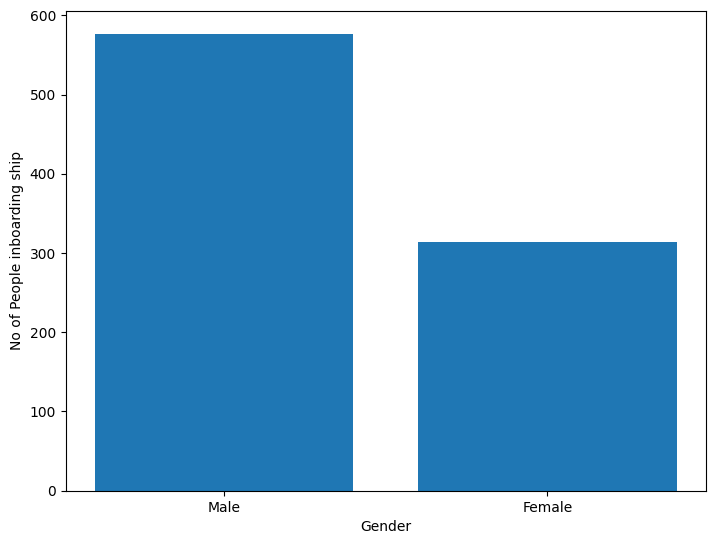

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel('Gender')
plt.ylabel('No of People inboarding ship')
plt.show()

In [ ]:
alive = len(train[train['Survived']==1])
dead = len(train[train['Survived'] ==0])

In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


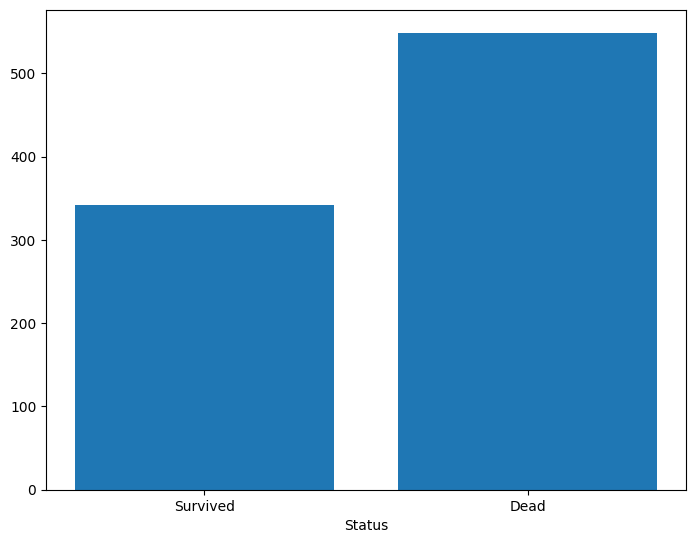

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind= [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()


Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people died')

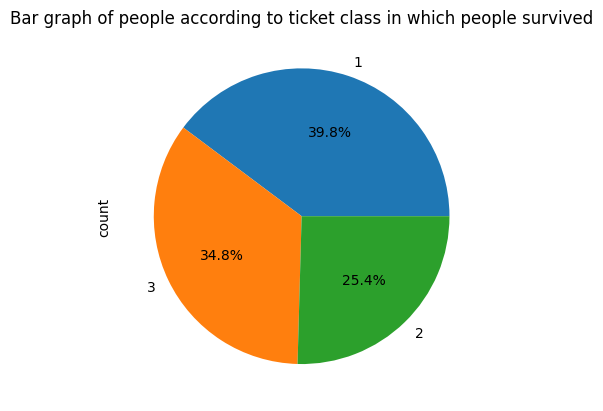

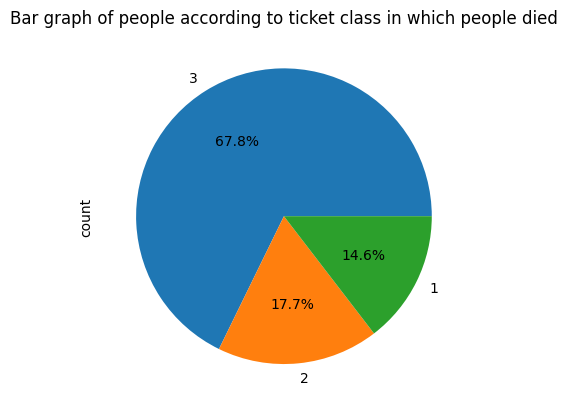

In [ ]:
plt.figure(1)
train.loc[train['Survived'] == 1,'Pclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Bar graph of people according to ticket class in which people survived')

plt.figure(2)
train.loc[train['Survived'] == 0,'Pclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Bar graph of people according to ticket class in which people died')

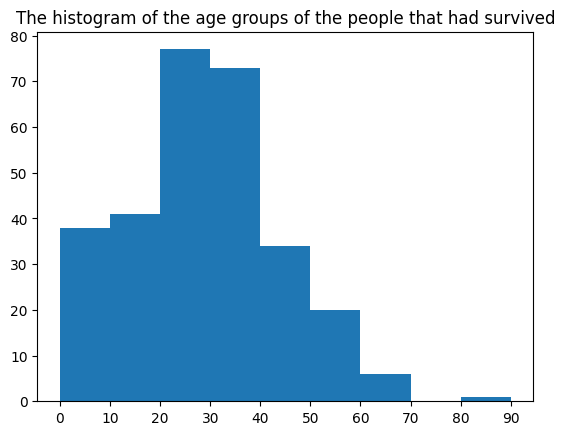

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(1)
age = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0, 100, 10))
plt.xticks(np.arange(0, 100, 10))

plt.figure(2)
age = train.loc[train.Survived == 0, 'Age']

In [ ]:
train[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Pclass","Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [ ]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


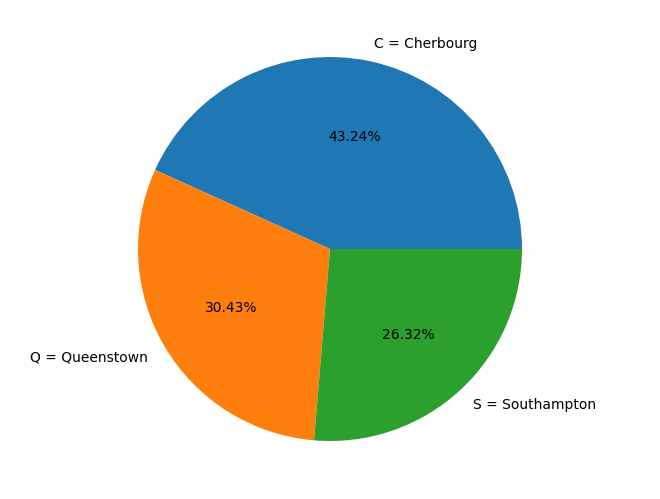

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [ ]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.00,418.00000,418,418,332.00000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.50,2.26555,NaN,NaN,30.27259,...,0.392344,NaN,35.627188,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
min,892.00,1.00000,NaN,NaN,0.17000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.25,1.00000,NaN,NaN,21.00000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.50,3.00000,NaN,NaN,27.00000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.75,3.00000,NaN,NaN,39.00000,...,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
train = train.drop(['Ticket'], axis =1)
test = test.drop(['Ticket'], axis =1)

In [ ]:
train = train.drop(['Cabin'], axis =1)
test = test.drop(['Cabin'], axis =1)

In [ ]:
train = train.drop(['Name'], axis =1)
test = test.drop(['Name'], axis =1)

In [ ]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']


In [ ]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [ ]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Embarked'].isnull().sum()
0

0

In [ ]:
d={'male':0,'female':1}


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.metrics import accuracy_score, pair_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report